In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models, losses, Model
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'D:\Work\Programming\Machine Learning\Python\SIH\Leaf Disease Detection\split_data'
# path='D:\Work\Programming\Python project\Projects\FemaleSecurity\data'

In [3]:
path_train_alternaria = os.path.join(path, 'train', 'alternaria')
path_train_black_rot = os.path.join(path, 'train', 'black_rot')
path_train_brown_spot = os.path.join(path, 'train', 'brown_spot')
path_train_cedar_rust = os.path.join(path, 'train', 'cedar_rust')
path_train_gray_spot = os.path.join(path, 'train', 'gray_spot')
path_train_healthy_leaf = os.path.join(path, 'train', 'healthy_leaf')
path_train_rust = os.path.join(path, 'train', 'rust')
path_train_scab = os.path.join(path, 'train', 'scab')

path_val_alternaria = os.path.join(path, 'val', 'alternaria')
path_val_black_rot = os.path.join(path, 'val', 'black_rot')
path_val_brown_spot = os.path.join(path, 'val', 'brown_spot')
path_val_cedar_rust = os.path.join(path, 'val', 'cedar_rust')
path_val_gray_spot = os.path.join(path, 'val', 'gray_spot')
path_val_healthy_leaf = os.path.join(path, 'val', 'healthy_leaf')
path_val_rust = os.path.join(path, 'val', 'rust')
path_val_scab = os.path.join(path, 'val', 'scab')



In [4]:
list_train_alternaria = os.listdir(path_train_alternaria)
training_alternaria = [[cv2.imread(os.path.join(
    path_train_alternaria, list_train_alternaria[i])), 0] for i in range(len(list_train_alternaria))]

In [5]:
list_train_black_rot = os.listdir(path_train_black_rot)
training_black_rot = [[cv2.imread(os.path.join(
    path_train_black_rot, list_train_black_rot[i])), 1] for i in range(len(list_train_black_rot))]

In [6]:
list_train_brown_spot = os.listdir(path_train_brown_spot)
training_brown_spot = [[cv2.imread(os.path.join(
    path_train_brown_spot, list_train_brown_spot[i])), 2] for i in range(len(list_train_brown_spot))]

In [7]:
list_train_cedar_rust = os.listdir(path_train_cedar_rust)
training_cedar_rust = [[cv2.imread(os.path.join(
    path_train_cedar_rust, list_train_cedar_rust[i])), 3] for i in range(len(list_train_cedar_rust))]

In [8]:
list_train_gray_spot = os.listdir(path_train_gray_spot)
training_gray_spot = [[cv2.imread(os.path.join(
    path_train_gray_spot, list_train_gray_spot[i])), 4] for i in range(len(list_train_gray_spot))]

In [9]:
list_train_healthy_leaf = os.listdir(path_train_healthy_leaf)
training_healthy_leaf = [[cv2.imread(os.path.join(
    path_train_healthy_leaf, list_train_healthy_leaf[i])), 5] for i in range(len(list_train_healthy_leaf))]

In [10]:
list_train_rust = os.listdir(path_train_rust)
training_rust = [[cv2.imread(os.path.join(
    path_train_rust, list_train_rust[i])), 6] for i in range(len(list_train_rust))]

In [11]:
list_train_scab = os.listdir(path_train_scab)
training_scab = [[cv2.imread(os.path.join(
    path_train_scab, list_train_scab[i])), 7] for i in range(len(list_train_scab))]

In [12]:
training = training_alternaria+training_black_rot+training_brown_spot+training_cedar_rust+training_gray_spot+training_healthy_leaf+training_rust+training_scab

In [13]:
list_val_alternaria = os.listdir(path_val_alternaria)
validation_alternaria = [[cv2.imread(os.path.join(
    path_val_alternaria, list_val_alternaria[i])), 0] for i in range(len(list_val_alternaria))]

In [14]:
list_val_black_rot = os.listdir(path_val_black_rot)
validation_black_rot = [[cv2.imread(os.path.join(
    path_val_black_rot, list_val_black_rot[i])), 1] for i in range(len(list_val_black_rot))]

In [15]:
list_val_brown_spot = os.listdir(path_val_brown_spot)
validation_brown_spot = [[cv2.imread(os.path.join(
    path_val_brown_spot, list_val_brown_spot[i])), 2] for i in range(len(list_val_brown_spot))]

In [16]:
list_val_cedar_rust = os.listdir(path_val_cedar_rust)
validation_cedar_rust = [[cv2.imread(os.path.join(
    path_val_cedar_rust, list_val_cedar_rust[i])), 3] for i in range(len(list_val_cedar_rust))]

In [17]:
list_val_gray_spot = os.listdir(path_val_gray_spot)
validation_gray_spot = [[cv2.imread(os.path.join(
    path_val_gray_spot, list_val_gray_spot[i])), 4] for i in range(len(list_val_gray_spot))]

In [18]:
list_val_healthy_leaf = os.listdir(path_val_healthy_leaf)
validation_healthy_leaf = [[cv2.imread(os.path.join(
    path_val_healthy_leaf, list_val_healthy_leaf[i])), 5] for i in range(len(list_val_healthy_leaf))]

In [19]:
list_val_rust = os.listdir(path_val_rust)
validation_rust = [[cv2.imread(os.path.join(
    path_val_rust, list_val_rust[i])), 6] for i in range(len(list_val_rust))]

In [20]:
list_val_scab = os.listdir(path_val_scab)
validation_scab = [[cv2.imread(os.path.join(
    path_val_scab, list_val_scab[i])), 7] for i in range(len(list_val_scab))]

In [21]:
validation =  validation_alternaria+validation_black_rot+validation_brown_spot+validation_cedar_rust+validation_gray_spot+validation_healthy_leaf+validation_rust+validation_scab

In [22]:
import random

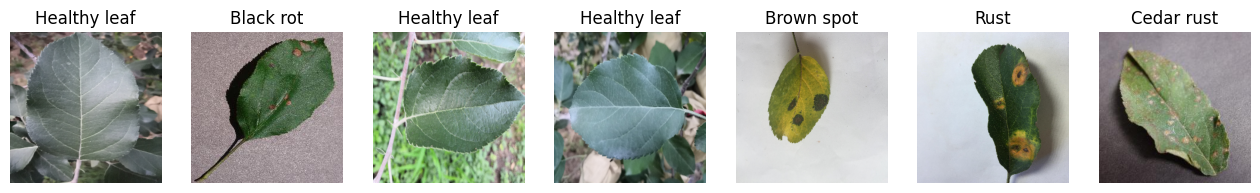

In [23]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(1, 7, i+1)
    index = random.randint(0, len(training) - 1)
    c = training[index][1]
    img = plt.imshow(cv2.cvtColor(training[index][0], cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off the axis
    if c == 0:
        plt.title("Alternaria", color='black')
    elif c == 1:
        plt.title("Black rot", color='black')
    elif c == 2:
        plt.title("Brown spot", color='black')
    elif c == 3:
        plt.title("Cedar rust", color='black')
    elif c == 4:
        plt.title("Gray spot", color='black')
    elif c == 5:
        plt.title("Healthy leaf", color='black')
    elif c == 6:
        plt.title("Rust", color='black')
    elif c == 7:
        plt.title("Scab", color='black')

plt.show()

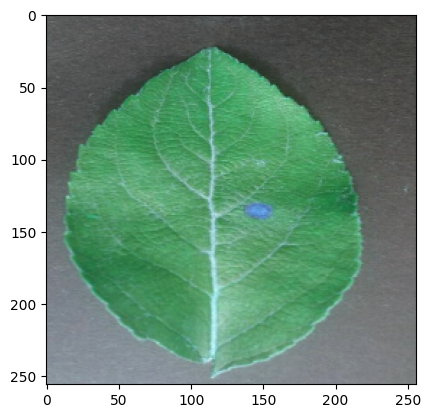

In [24]:
plt.imshow(training[0][0])

In [25]:
valid_training = []  # List to store valid (non-empty) images

for i in range(len(training)):
    image = training[i][0]
    
    # Check if the image is loaded correctly
    if image is None or image.size == 0:
        print(f"Image at index {i} is empty or not loaded correctly. Removing from dataset.")
        continue  # Skip invalid images
    
    # Resize the valid image
    image_resize = cv2.resize(image, (100, 100))
    
    # Append the resized image and its label to the new valid_training list
    valid_training.append([image_resize, training[i][1]])

print(f"Image resizing completed. {len(valid_training)} valid images retained out of {len(training)}.")

training = valid_training


Image at index 456 is empty or not loaded correctly. Removing from dataset.
Image at index 457 is empty or not loaded correctly. Removing from dataset.
Image at index 458 is empty or not loaded correctly. Removing from dataset.
Image at index 459 is empty or not loaded correctly. Removing from dataset.
Image at index 460 is empty or not loaded correctly. Removing from dataset.
Image at index 461 is empty or not loaded correctly. Removing from dataset.
Image resizing completed. 1473 valid images retained out of 1479.


In [26]:
for i in range(5):
    print(training[i][0].shape, end=' - ')

(100, 100, 3) - (100, 100, 3) - (100, 100, 3) - (100, 100, 3) - (100, 100, 3) - 

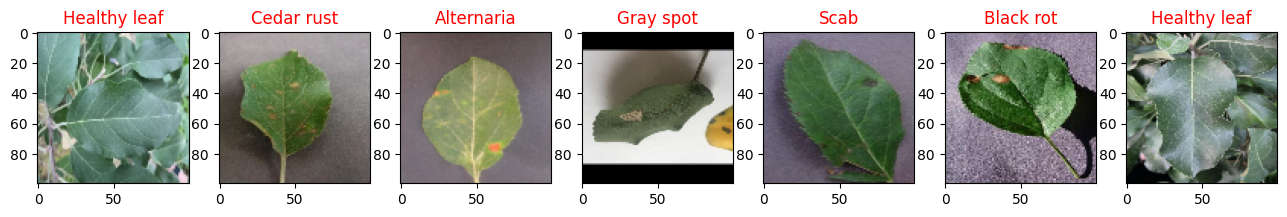

In [27]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(1, 7, i+1)
    index = random.randint(0, len(training))
    c = training[index][1]
    plt.imshow(cv2.cvtColor(training[index][0], cv2.COLOR_BGR2RGB))
    if c == 0:
        plt.title("Alternaria", color='red')
    elif c == 1:
        plt.title("Black rot", color='red')
    elif c == 2:
        plt.title("Brown spot", color='red')
    elif c == 3:
        plt.title("Cedar rust", color='red')
    elif c == 4:
        plt.title("Gray spot", color='red')
    elif c == 5:
        plt.title("Healthy leaf", color='red')
    elif c == 6:
        plt.title("Rust", color='red')
    elif c == 7:
        plt.title("Scab", color='red')

In [28]:
for i in range(len(training)):
    image = training[i][0]
    
    # Check if the image is loaded correctly
    if image is None or image.size == 0:
        print(f"Image at index {i} is empty or not loaded correctly.")
        continue  # Skip resizing for empty images
    
    # Resize the valid image
    image_resize = cv2.resize(image, (100, 100))
    training[i][0] = image_resize

print("Image resizing completed.")


Image resizing completed.


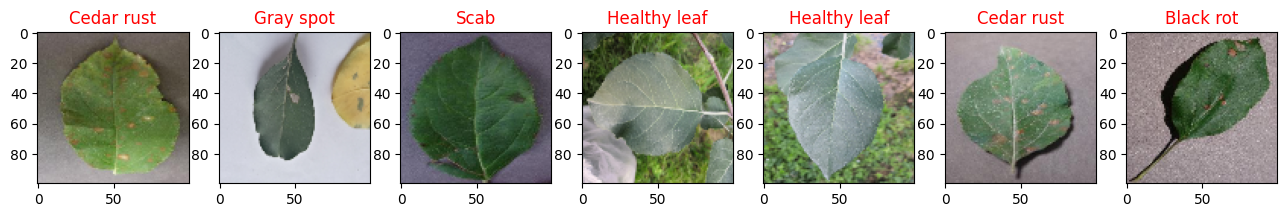

In [29]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(1, 7, i+1)
    index = random.randint(0, len(training))
    c = training[index][1]
    plt.imshow(cv2.cvtColor(training[index][0], cv2.COLOR_BGR2RGB))
    if c == 0:
        plt.title("Alternaria", color='red')
    elif c == 1:
        plt.title("Black rot", color='red')
    elif c == 2:
        plt.title("Brown spot", color='red')
    elif c == 3:
        plt.title("Cedar rust", color='red')
    elif c == 4:
        plt.title("Gray spot", color='red')
    elif c == 5:
        plt.title("Healthy leaf", color='red')
    elif c == 6:
        plt.title("Rust", color='red')
    elif c == 7:
        plt.title("Scab", color='red')

In [30]:
random.shuffle(training)

In [31]:
random.shuffle(validation)

In [32]:
type(training)

list

In [33]:
X_train = []
Y_train = []
for i in range(len(training)):
    X_train.append(training[i][0])
    Y_train.append(training[i][1])

In [34]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [35]:
print(X_train.shape)
print(Y_train.shape)

(1473, 100, 100, 3)
(1473,)


In [36]:
X_val = []
Y_val = []
for i in range(len(validation)):
    X_val.append(validation[i][0])
    Y_val.append(validation[i][1])

In [37]:
X_val = np.array(X_val)
Y_val = np.array(Y_val)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (319,) + inhomogeneous part.

In [ ]:
print(X_val.shape)
print(Y_val.shape)

In [ ]:
def inception(x,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool):  
            path1 = layers.Conv2D(filters_1x1, (1, 1), padding='same',    activation='relu')(x) 
            path2 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
            path2 = layers.Conv2D(filters_3x3, (1, 1), padding='same', activation='relu')(path2)  
            path3 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
            path3 = layers.Conv2D(filters_5x5, (1, 1), padding='same', activation='relu')(path3)  
            path4 = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
            path4 = layers.Conv2D(filters_pool, (1, 1), padding='same', activation='relu')(path4)  
            return tf.concat([path1, path2, path3, path4], axis=3)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (4, 4), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(36, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(16, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(256, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=25,
                    batch_size=20, validation_split=0.3)

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], linestyle='--',
         color='green', label='train_loss')
plt.plot(history.history['val_loss'], linestyle='--',
         color='blue', label='val_loss')
plt.legend()
plt.title(" loss VS val_loss ")
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], linestyle='--',
         color='green', label='train_accuracy')
plt.plot(history.history['val_accuracy'],
         linestyle='--', color='blue', label='val_accuracy')
plt.legend()
plt.title(" accuracy VS val_accuracy ")

In [ ]:
prediction = model.predict(X_val)

In [ ]:
X_val.shape

In [ ]:
predictions = prediction >= 0.5

In [ ]:
predict = predictions.astype(int)

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    index = random.randint(0, 11649)
    plt.imshow(X_val[index])
    plt.title(
        f"predict  {predict[index]}, reality {Y_val[index]}", color='red')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
accuracy_score(Y_val, predict)

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(confusion_matrix(Y_val, predict), cmap='viridis', annot=True)